<a href="https://colab.research.google.com/github/Dpjaiswal/-Support-Vector-Machines-SVM-/blob/main/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

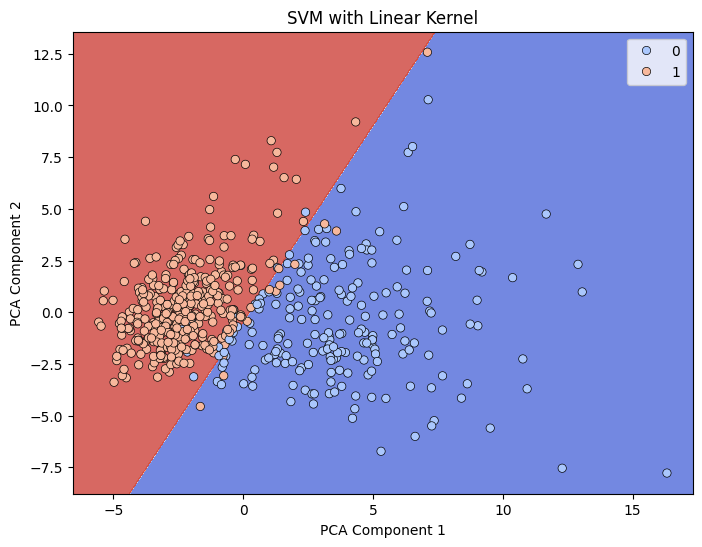

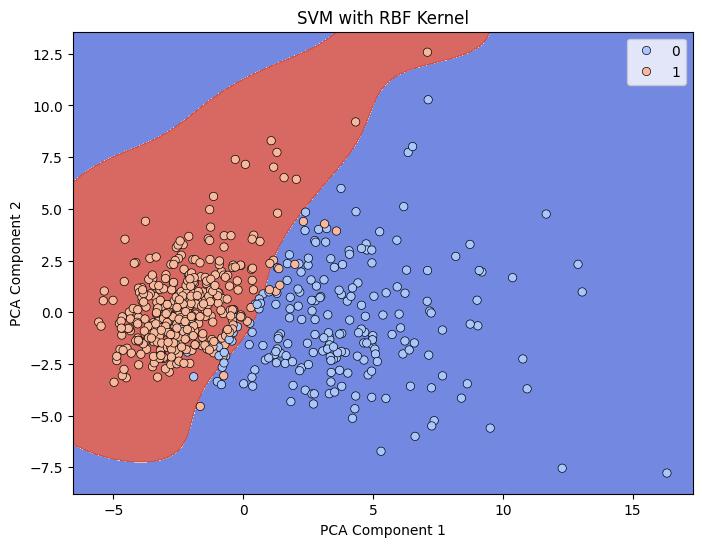

Best Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross-validation Accuracy Scores: [0.9122807  0.92105263 0.95614035 0.94736842 0.97345133]
Average CV Score: 0.9420586865393572


In [3]:
# Support Vector Machine Task: Linear & RBF Kernel on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train SVM with linear kernel
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

# Step 5: Train SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svc_rbf.fit(X_train, y_train)

# Step 6: Visualization function
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Step 7: Plot boundaries
plot_decision_boundary(svc_linear, X_pca, y, "SVM with Linear Kernel")
plot_decision_boundary(svc_rbf, X_pca, y, "SVM with RBF Kernel")

# Step 8: Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

# Step 9: Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Cross-validation
cv_scores = cross_val_score(best_model, X_pca, y, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))
